# Tema 5: Reconocimiento de Patrones

## Clasificador Estadístico Bayesiano

Vamos a generar datos aleatoriamente de varias distribuciones de probablidad normales (o Gaussianas)

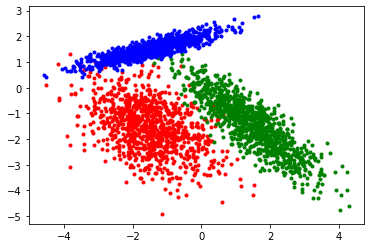

In [63]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

X,y = make_classification(n_samples=3000, 
                          n_features=2, n_informative=2, n_redundant=0, n_repeated=0, 
                          n_classes=4, 
                          n_clusters_per_class=1,
                          class_sep=1.5, flip_y=0,
                          weights=[1./3,1./3.,1/.3])

ys = np.unique(y)
colors_plt = ['r.', 'g.', '.b']
for i in range(len(ys)):
  Xc = X[y==ys[i]]
  plt.plot(Xc[:,0], Xc[:,1], colors_plt[i])

# Clasificador Bayesiano con Gaussianas
Utilizaremos OpenCV para las pruebas

In [64]:
import cv2
import numpy as np

clf = cv2.ml.NormalBayesClassifier_create()

# En OpenCV el vector de características tiene que ser de tipo np.float32 y las etiquetas de tipo int. 
# Si las características son float64, la ejecución fallará sin explicación e igualmente si el vector 
# de etiquetas no es int ocurrirá lo mismo
clf.train(np.float32(X), cv2.ml.ROW_SAMPLE, np.int32(y))

num_data = X.shape[0]
_, predicted = clf.predict(np.float32(X))
acierto_train = np.sum((y.reshape(num_data,1) == predicted.reshape(num_data,1)))/y.shape[0]

print("El acierto en train es del ", 100*acierto_train, "%")

El acierto en train es del  98.83333333333333 %


# Clasificador Naïve Bayes con Gaussianas
En este caso asumimos independencia entre las características

In [65]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [66]:
num_data = X.shape[0]
predicted = gnb.predict(X)

acierto_train = np.sum((y.reshape(num_data,1) == predicted.reshape(num_data,1)))/y.shape[0]

print("El acierto en train es del ", acierto_train*100, "%")

El acierto en train es del  95.5 %
